In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
plt.style.use('ggplot')
mpl.rcParams['figure.dpi'] = 150

In [3]:
df = pd.read_csv('data/awards.csv', index_col=0)
df.head()

,Date,ActorID,Actor,Role(s),Film,Link,Born,Died,Birthplace,Deathplace,Children
0,1929-05-16,0,Emil Jannings,"Grand Duke Sergius Alexander, August Schilling","The Last Command, The Way of All Flesh",/wiki/Emil_Jannings,1884-07-23,1950-01-02,"Rorschach, Switzerland","Strobl, Allied-occupied Austria",1
1,1930-04-03,1,Warner Baxter,The Cisco Kid,In Old Arizona,/wiki/Warner_Baxter,1889-03-29,1951-05-07,"Columbus, Ohio, U.S.","Beverly Hills, California, U.S.",0
2,1930-11-05,2,George Arliss,Benjamin Disraeli,Disraeli,/wiki/George_Arliss,1868-04-10,1946-02-05,"London, England","London, England",0
3,1931-11-10,3,Lionel Barrymore,Stephen Ashe,A Free Soul,/wiki/Lionel_Barrymore,1878-04-28,1954-11-15,"Philadelphia, Pennsylvania, U.S.","Los Angeles, California, U.S.",2
4,1932-11-18,4,Wallace Beery,"Andy ""Champ"" Purcell",The Champ,/wiki/Wallace_Beery,1885-04-01,1949-04-15,"Clay County, Missouri, U.S.","Beverly Hills, California, U.S.",1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 96
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        97 non-null     object
 1   ActorID     97 non-null     int64 
 2   Actor       97 non-null     object
 3   Role(s)     97 non-null     object
 4   Film        97 non-null     object
 5   Link        97 non-null     object
 6   Born        97 non-null     object
 7   Died        52 non-null     object
 8   Birthplace  97 non-null     object
 9   Deathplace  52 non-null     object
 10  Children    97 non-null     int64 
dtypes: int64(2), object(9)
memory usage: 9.1+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Born'] = pd.to_datetime(df['Born'])
df['Died'] = pd.to_datetime(df['Died'])

# Which actors got the most awards?

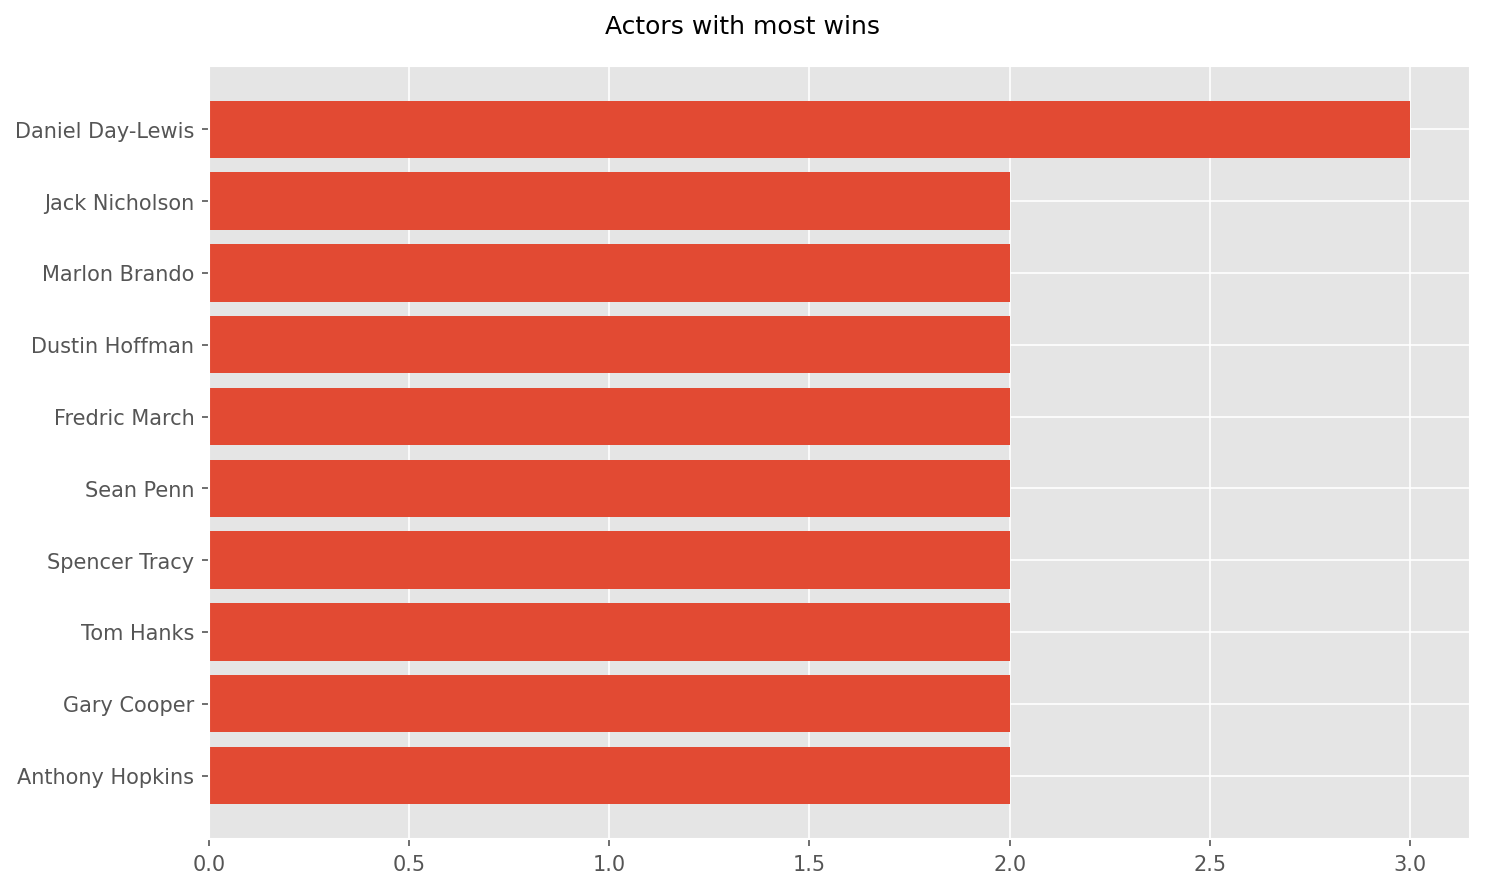

In [6]:
top_winners = df.groupby('Actor').agg({
    'Film': 'count'
}).reset_index().sort_values(by='Film', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(10, 6))

y = top_winners['Actor']
width = top_winners['Film']
ax.barh(y=y,
       width=width)

ax.invert_yaxis()


plt.suptitle('Actors with most wins')


plt.tight_layout()
plt.show()

# Which actors were the youngest when they got the award?

In [7]:
df['AgeOnWin'] = (df['Date'] - df['Born']).dt.days / 365.2425

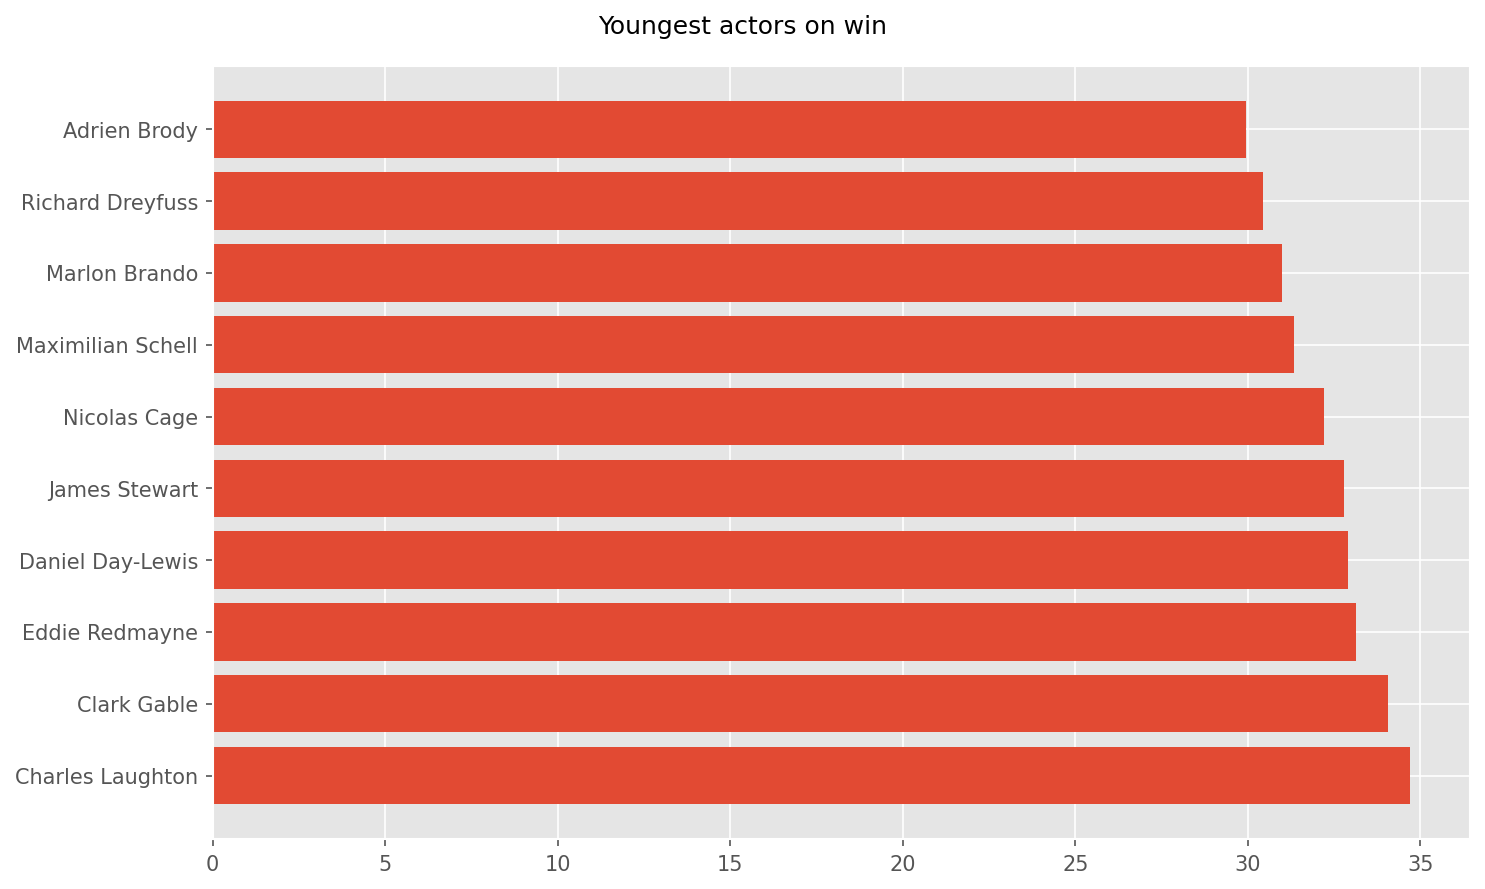

In [8]:
youngest_on_win = df.sort_values(by='AgeOnWin', ascending=True)[:10]

fig, ax = plt.subplots(figsize=(10, 6))

y = youngest_on_win['Actor']
width = youngest_on_win['AgeOnWin']

ax.barh(y=y,
       width=width)

ax.invert_yaxis()

plt.suptitle('Youngest actors on win')

plt.tight_layout()
plt.show()

# What about the oldest?

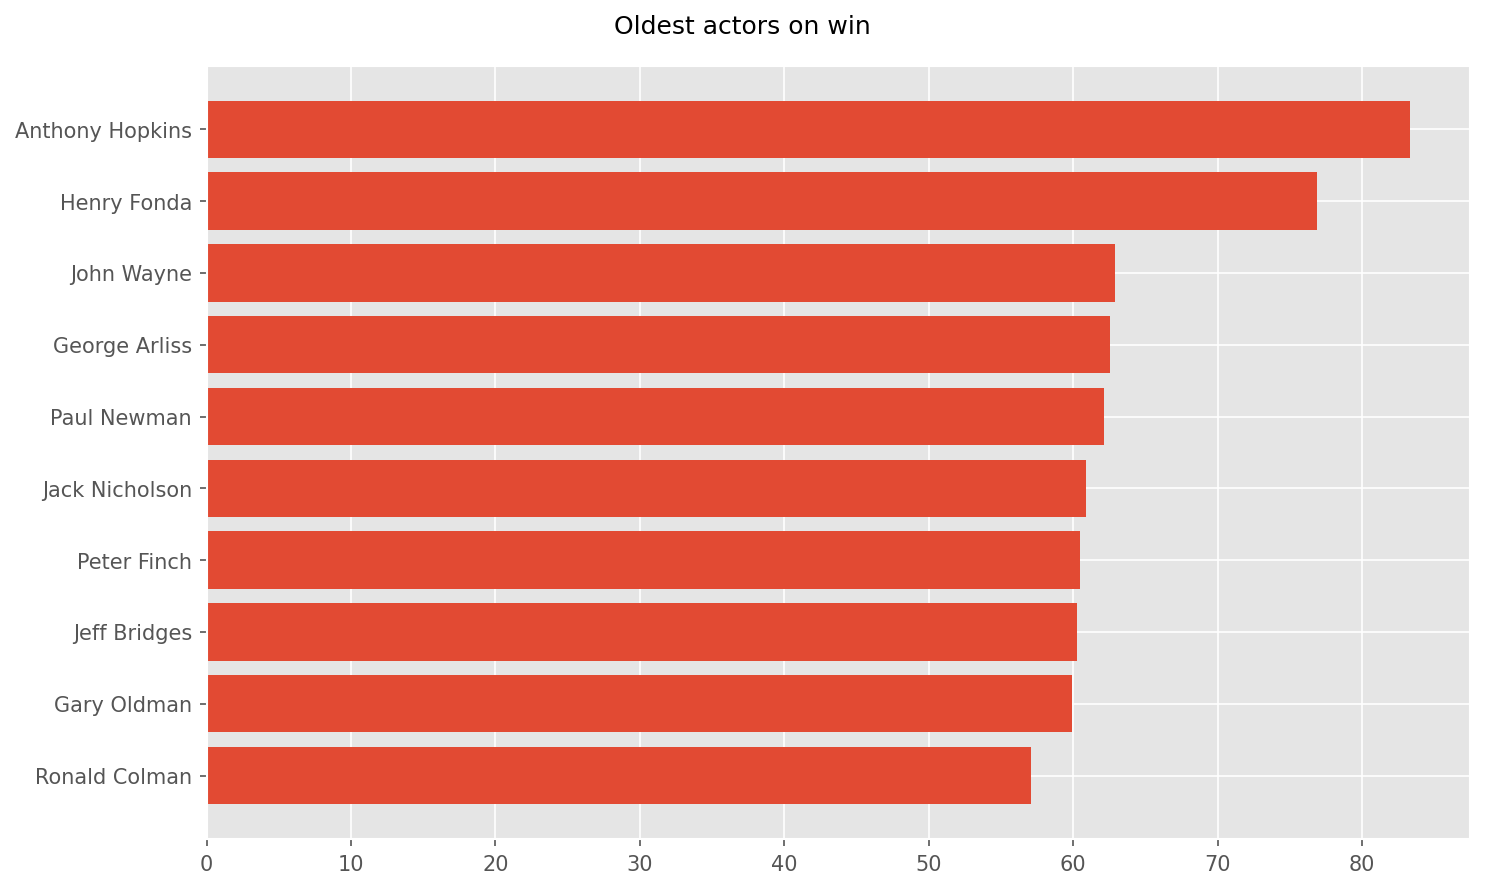

In [9]:
oldest_on_win = df.sort_values(by='AgeOnWin', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(10, 6))

y = oldest_on_win['Actor']
width = oldest_on_win['AgeOnWin']

ax.barh(y=y,
       width=width)

ax.invert_yaxis()


plt.suptitle('Oldest actors on win')
plt.tight_layout()
plt.show()

# How did ages changed along ceremonies?

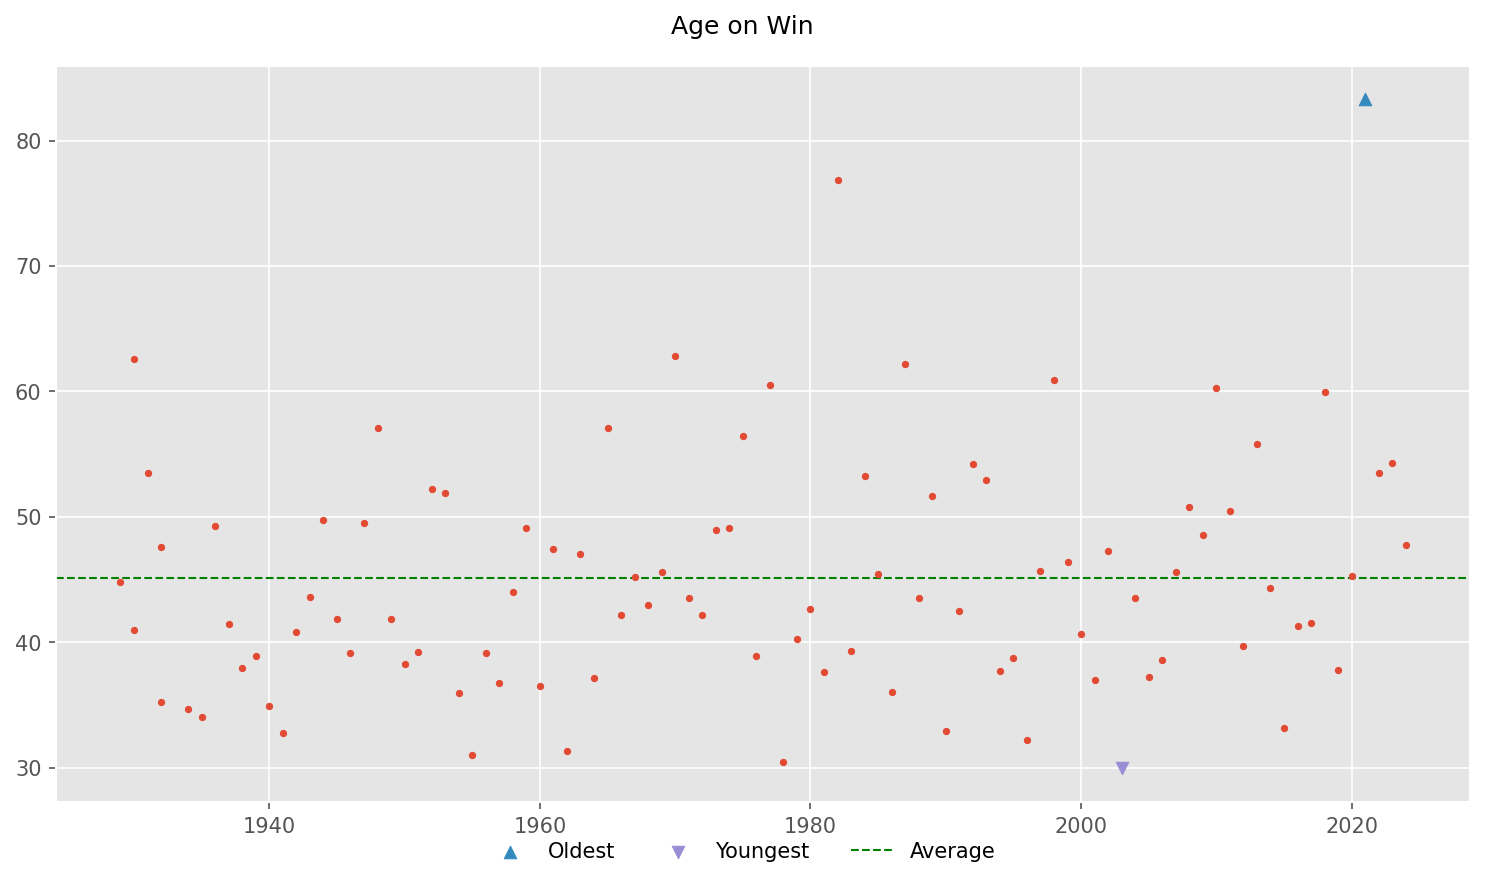

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

new_df = df.loc[(df['AgeOnWin'] != df['AgeOnWin'].max()) & (df['AgeOnWin'] != df['AgeOnWin'].min())]

x = new_df['Date'].dt.year
y = new_df['AgeOnWin']

ax.scatter(x=x,
           y=y,
           marker='.',
           zorder=2)

oldest = df.loc[df['AgeOnWin'].idxmax()]

x_oldest = oldest['Date'].year
y_oldest = oldest['AgeOnWin']

ax.scatter(x=x_oldest,
           y=y_oldest,
           label='Oldest',
           marker='^')

youngest = df.loc[df['AgeOnWin'].idxmin()]

x_youngest = youngest['Date'].year
y_youngest = youngest['AgeOnWin']

ax.scatter(x=x_youngest,
           y=y_youngest,
           label='Youngest',
           marker='v')

ax.axhline(df['AgeOnWin'].mean(),
           lw=1,
           ls='--',
           zorder=1,
           color='green',
           label='Average')

plt.suptitle('Age on Win')
ax.legend(loc='center', bbox_to_anchor=(.5, .05), bbox_transform=fig.transFigure, ncols=3, frameon=False)

plt.tight_layout()
plt.show()

# Is it common for winners to have lots of children?

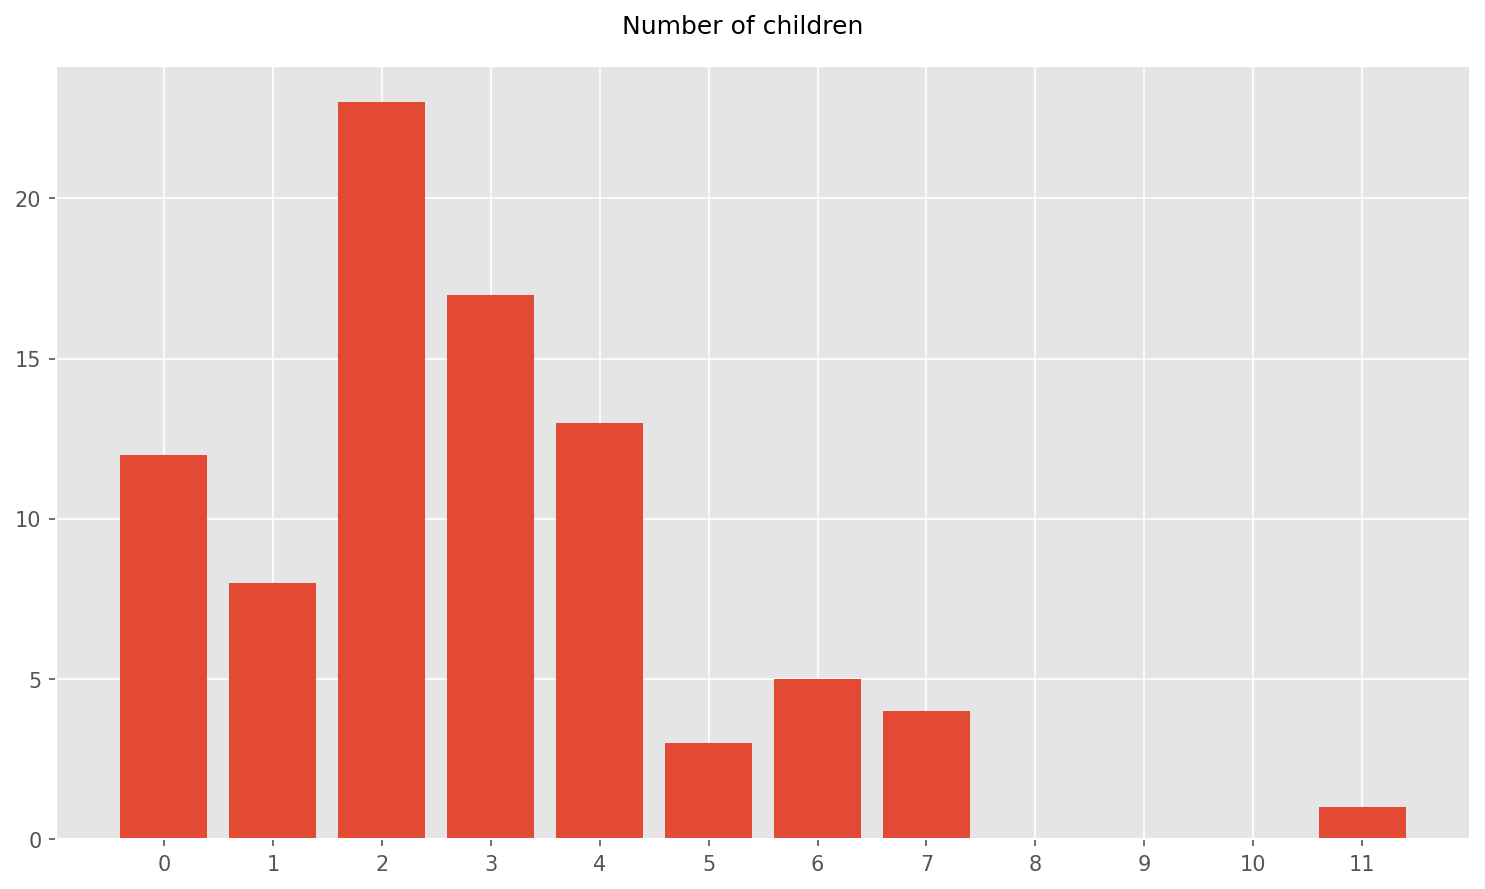

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

children = df.drop_duplicates(subset=['ActorID'])
children = children.groupby('Children').agg({
    'ActorID': 'count'
}).reset_index().sort_values(by='Children')

x = children['Children']
height = children['ActorID']
ax.bar(x=x,
       height=height)

ax.set(xticks=[i for i in range(children['Children'].max()+1)])
plt.suptitle('Number of children')

plt.tight_layout()
plt.show()

# How many times do Oscar Winners usually get married?

In [12]:
marriages = pd.read_csv('data/marriages.csv', index_col=0)
marital = pd.merge(df.drop_duplicates(subset=['ActorID']), marriages, on='ActorID')
marital.isna().sum()

Date           0
ActorID        0
Actor          0
Role(s)        0
Film           0
Link           0
Born           0
Died          61
Birthplace     0
Deathplace    61
Children       0
AgeOnWin       0
Spouse         3
From           0
To            59
dtype: int64

In [13]:
marital['Spouse'] = marital['Spouse'].ffill()
marital['To'] = marital['To'].fillna(marital['Died'].dt.year)
marital.isna().sum()

Date           0
ActorID        0
Actor          0
Role(s)        0
Film           0
Link           0
Born           0
Died          61
Birthplace     0
Deathplace    61
Children       0
AgeOnWin       0
Spouse         0
From           0
To            21
dtype: int64

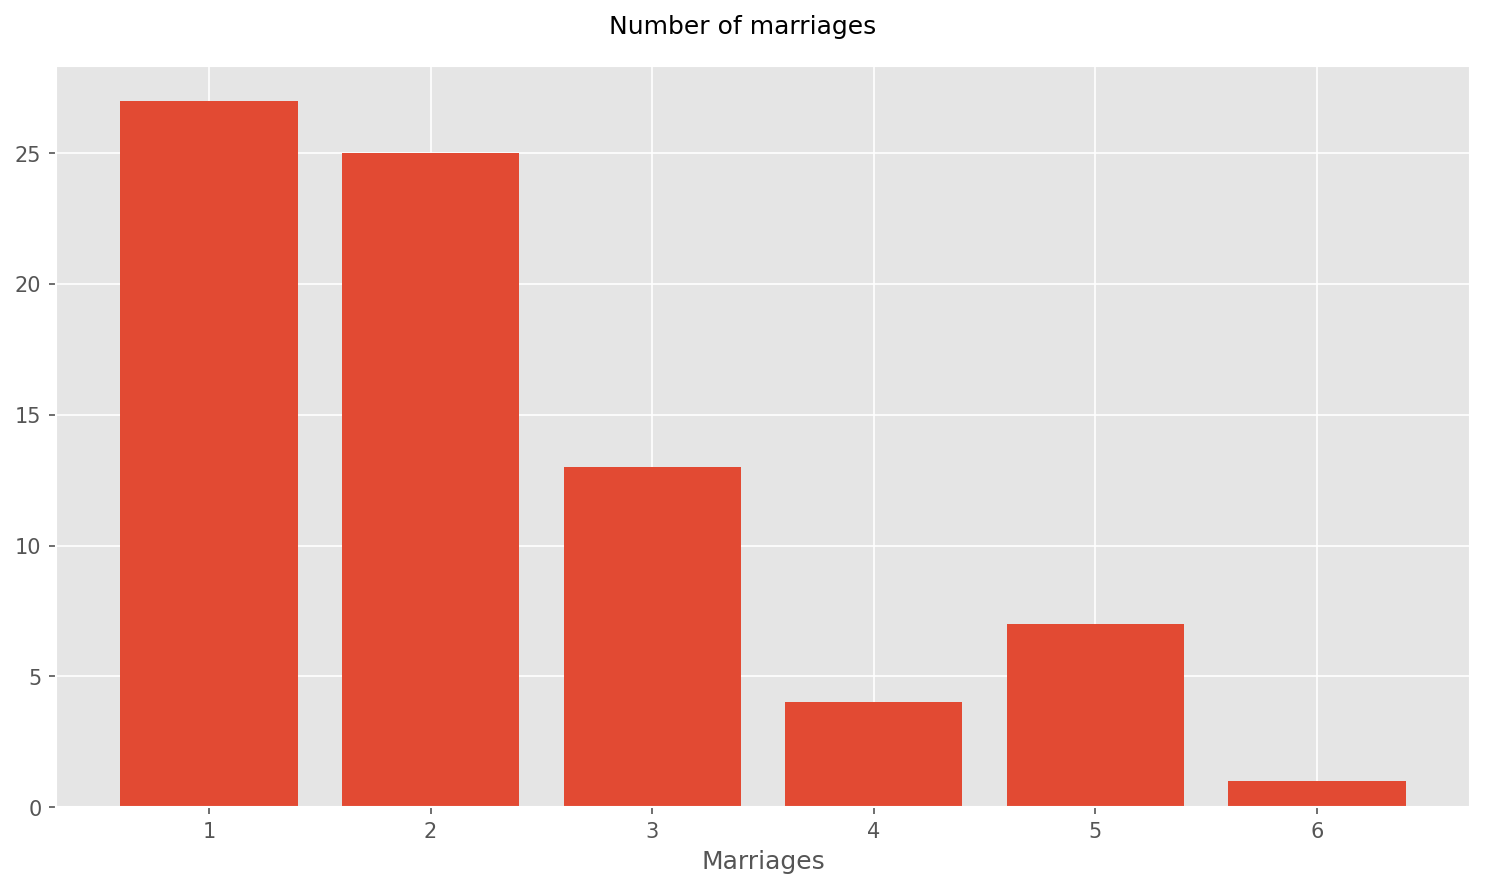

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))

x = marital['ActorID'].value_counts().value_counts().index
height = marital['ActorID'].value_counts().value_counts()
ax.bar(x=x,
       height=height)


ax.set_xlabel('Marriages')

plt.suptitle('Number of marriages')

plt.tight_layout()
plt.show()

# How many times have marriages happened pre or post becoming a recipient?

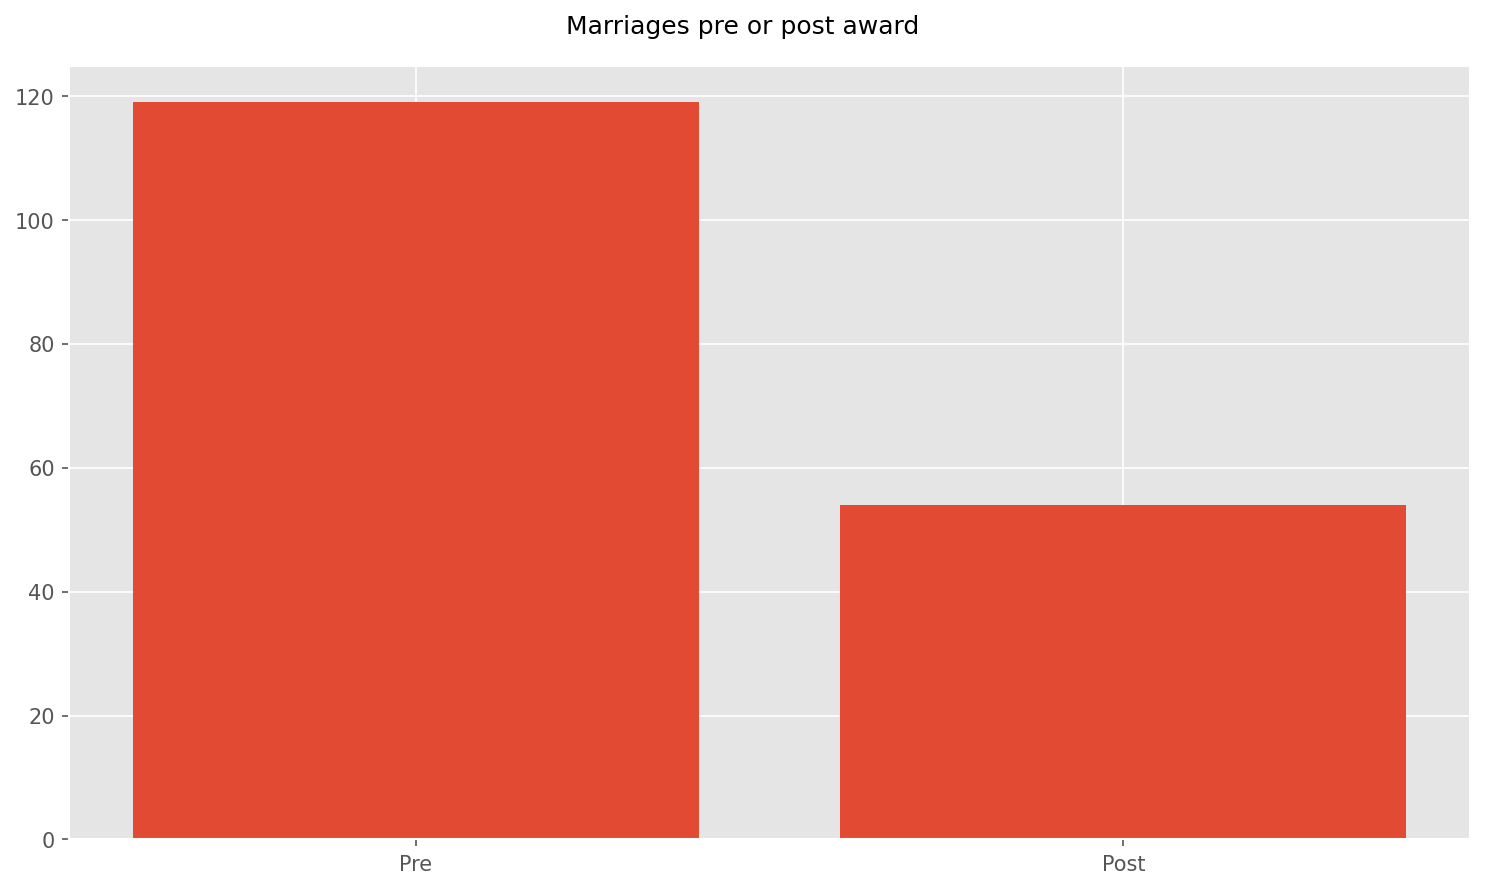

In [15]:
marriages_post = marriages.loc[marital['From'] > marital['Date'].dt.year].shape[0]
marriages_pre = marriages.loc[marital['From'] <= marital['Date'].dt.year].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=['Pre', 'Post'],
       height=[marriages_pre, marriages_post])


plt.suptitle('Marriages pre or post award')

plt.tight_layout()
plt.show()

# What about divorces?

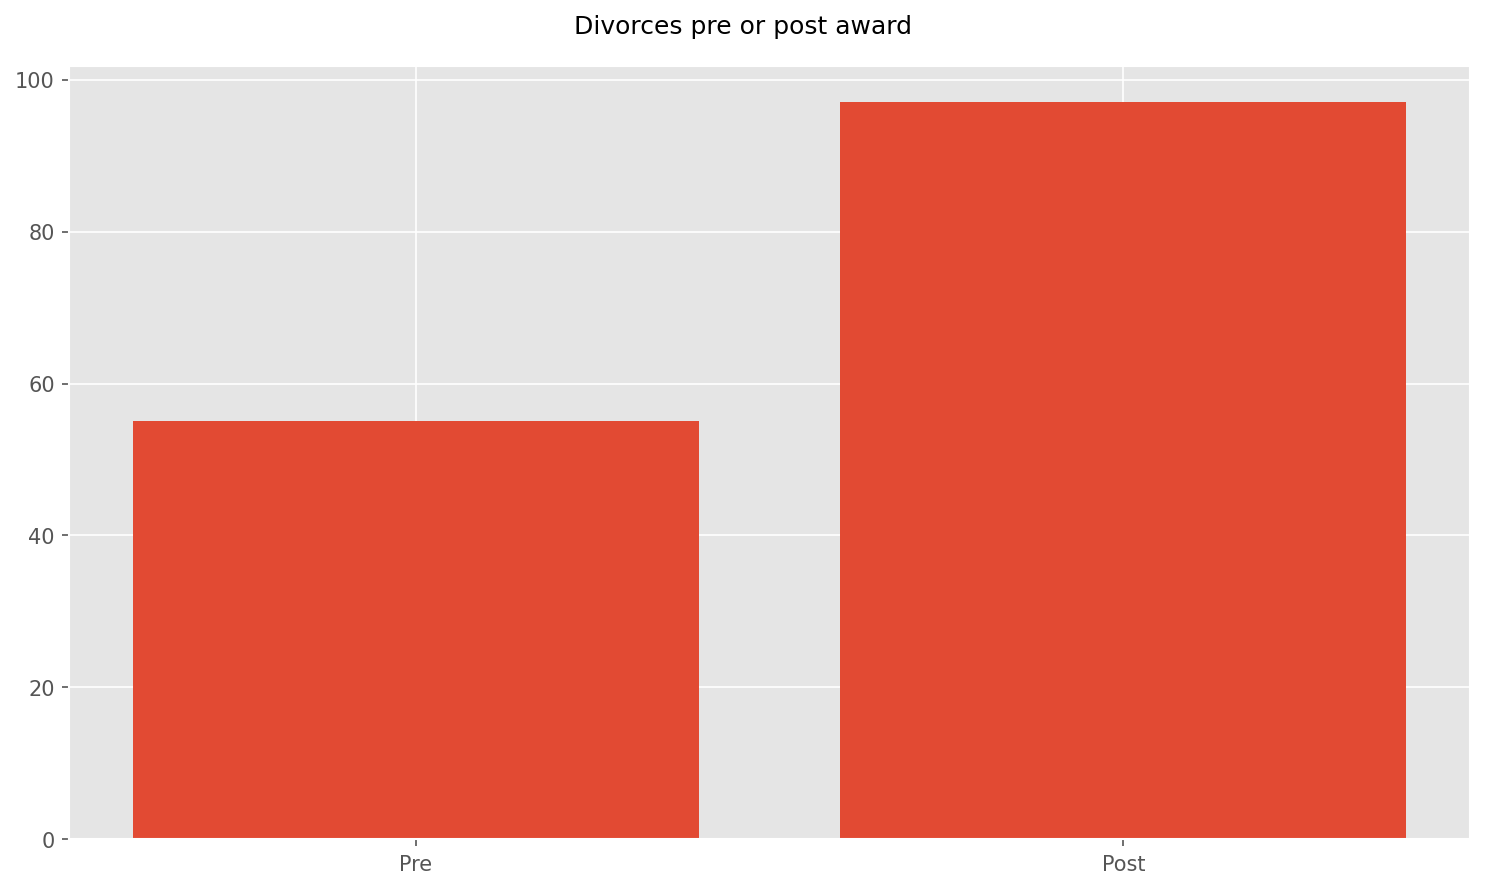

In [16]:
divorces_post = marriages.loc[marital['To'] > marital['Date'].dt.year].shape[0]
divorces_pre = marriages.loc[marital['To'] <= marital['Date'].dt.year].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=['Pre', 'Post'],
       height=[divorces_pre, divorces_post])


plt.suptitle('Divorces pre or post award')

plt.tight_layout()
plt.show()

# Marriages and divorces together

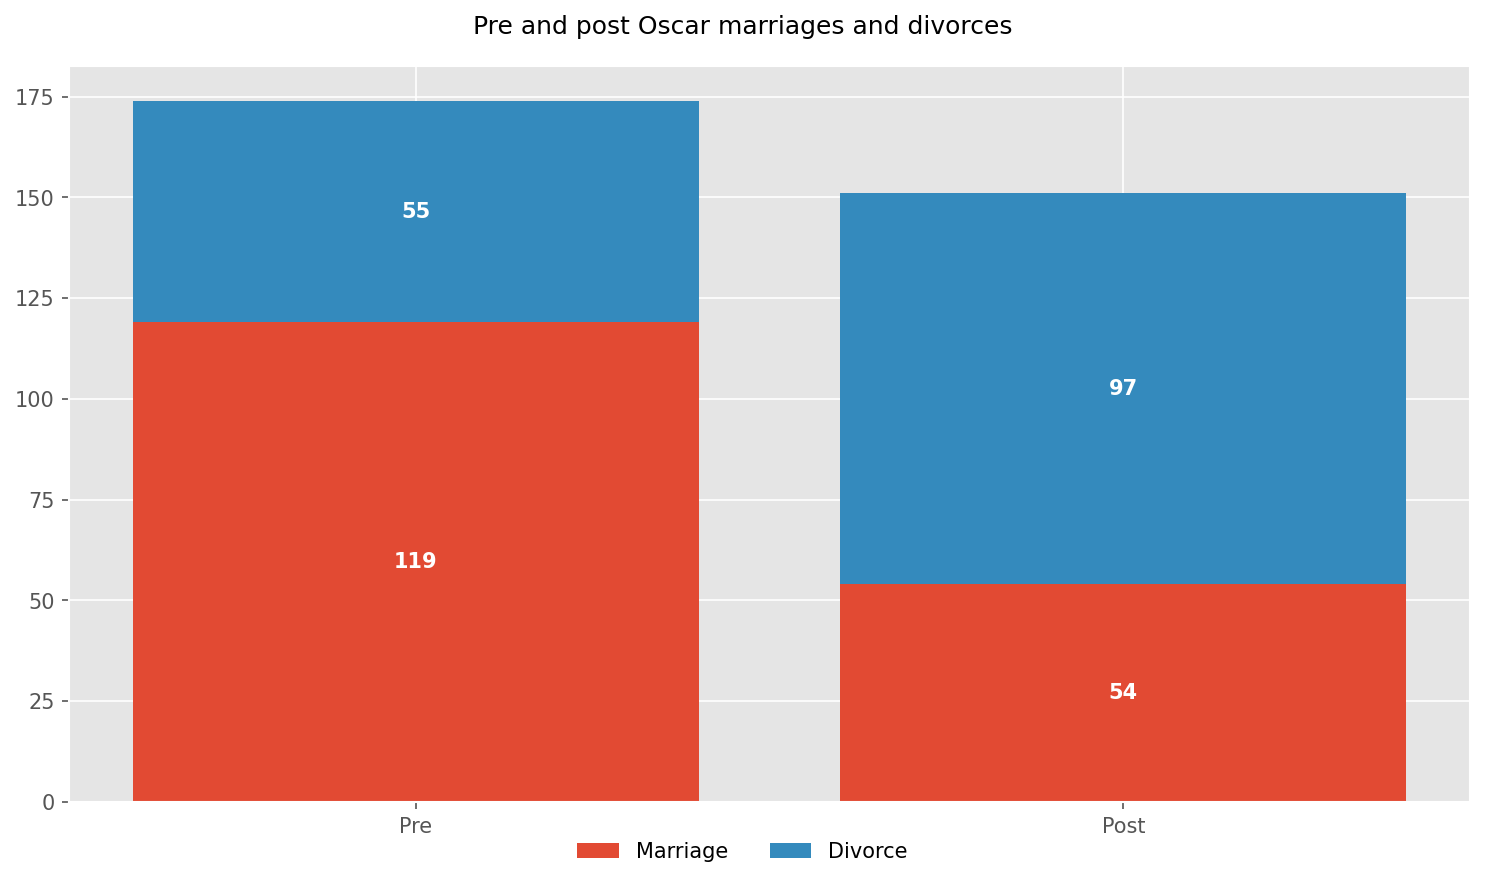

In [17]:
marriage_pre = marriages.loc[marital['From'] <= marital['Date'].dt.year].shape[0]
marriage_post = marriages.loc[marital['From'] > marital['Date'].dt.year].shape[0]
divorce_pre = marriages.loc[marital['To'] <= marital['Date'].dt.year].shape[0]
divorce_post = marriages.loc[marital['To'] > marital['Date'].dt.year].shape[0]

fig, ax = plt.subplots(figsize=(10, 6))

x = ['Pre', 'Post']

ax.bar(x, [marriage_pre, marriage_post], label='Marriage')
ax.bar(x, [divorce_pre, divorce_post], bottom=[marriage_pre, marriage_post], label='Divorce')

for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          round(bar.get_height()), ha='center',
          va='center', color='w', weight='bold',
          size=10)

plt.suptitle('Pre and post Oscar marriages and divorces')

ax.legend(loc='center', bbox_to_anchor=(.5, .05), bbox_transform=fig.transFigure, ncols=2, frameon=False)

plt.tight_layout()
plt.show()

# What countries have the most winners?

In [18]:
for row in df['Birthplace']:
    print(row.split(',')[-1])

 Switzerland
 U.S.
 England
 U.S.
 U.S.
 U.S.
 England
 U.S.
 U.K.
 Ukraine)
 U.S.
 U.S.
 England
 U.S.
 U.S.
 U.S.
 Austria-Hungary
 U.S.
 Wales
 U.S.
 UK
 England
 U.S.
 Puerto Rico
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 Far Eastern Republic
 England
 England
 U.S.
 U.S.
 Austria
 U.S.
 U.S.
 England
 U.S.
 England
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 England
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 England
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 England
 England
 Wales
 U.S.
 U.S.
 U.S.
 U.S.
 Australia
 U.S.
 Italy
 U.S.
 New Zealand
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 U.S.
 England
 U.S.
 U.S.
 England
 France
 England
 U.S.
 England
 U.S.
 U.S.
 England
 U.S.
 Puerto Rico
 Wales
 U.S.
 U.S.
 Ireland


In [19]:
def get_country(text):
    country = text.split(',')[-1].strip(')')
    return country

In [20]:
actors = df.drop_duplicates(subset=['ActorID'])
actors['Country'] = actors['Birthplace'].apply(get_country)

C:\Users\jbald\AppData\Local\Temp\ipykernel_8848\1456282159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors['Country'] = actors['Birthplace'].apply(get_country)


In [21]:
actors['Country'].unique()

array([' Switzerland', ' U.S.', ' England', ' U.K.', ' Ukraine',
       ' Austria-Hungary', ' Wales', ' UK', ' Puerto Rico',
       ' Far Eastern Republic', ' Austria', ' Australia', ' Italy',
       ' New Zealand', ' France', ' Ireland'], dtype=object)

In [22]:
actors['Country'] = actors['Country'].str.strip()
actors['Country'].unique()

C:\Users\jbald\AppData\Local\Temp\ipykernel_8848\3967193400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors['Country'] = actors['Country'].str.strip()


array(['Switzerland', 'U.S.', 'England', 'U.K.', 'Ukraine',
       'Austria-Hungary', 'Wales', 'UK', 'Puerto Rico',
       'Far Eastern Republic', 'Austria', 'Australia', 'Italy',
       'New Zealand', 'France', 'Ireland'], dtype=object)

In [23]:
mask = (actors['Country'] == 'U.S') | (actors['Country'] == 'US')
actors.loc[mask, 'Country'] = 'U.S.'
actors['Country'].unique()

array(['Switzerland', 'U.S.', 'England', 'U.K.', 'Ukraine',
       'Austria-Hungary', 'Wales', 'UK', 'Puerto Rico',
       'Far Eastern Republic', 'Austria', 'Australia', 'Italy',
       'New Zealand', 'France', 'Ireland'], dtype=object)

In [24]:
mask = actors['Country'] == 'UK'
actors.loc[mask, 'Country'] = 'U.K.'
actors['Country'].unique()

array(['Switzerland', 'U.S.', 'England', 'U.K.', 'Ukraine',
       'Austria-Hungary', 'Wales', 'Puerto Rico', 'Far Eastern Republic',
       'Austria', 'Australia', 'Italy', 'New Zealand', 'France',
       'Ireland'], dtype=object)

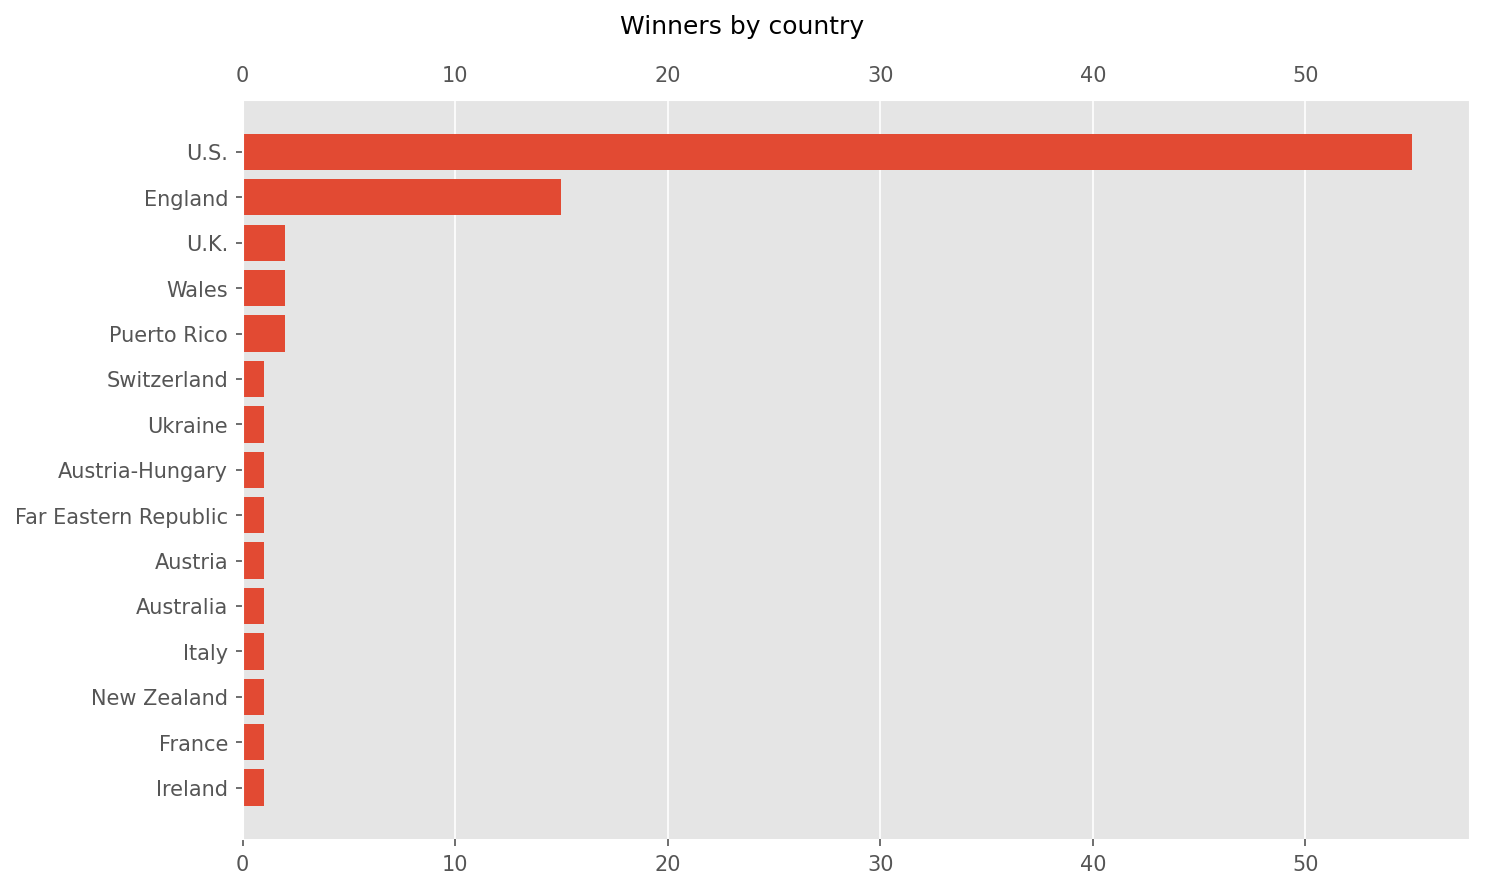

In [25]:
countries = actors['Country'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

y = countries.index
width = countries.values

ax.barh(y=y, width=width)
ax.invert_yaxis()
ax.grid(axis='y', visible=False)
ax.tick_params(labeltop=True)
ax.spines.bottom.set_visible(False)
plt.suptitle('Winners by country')
plt.tight_layout()
plt.show()

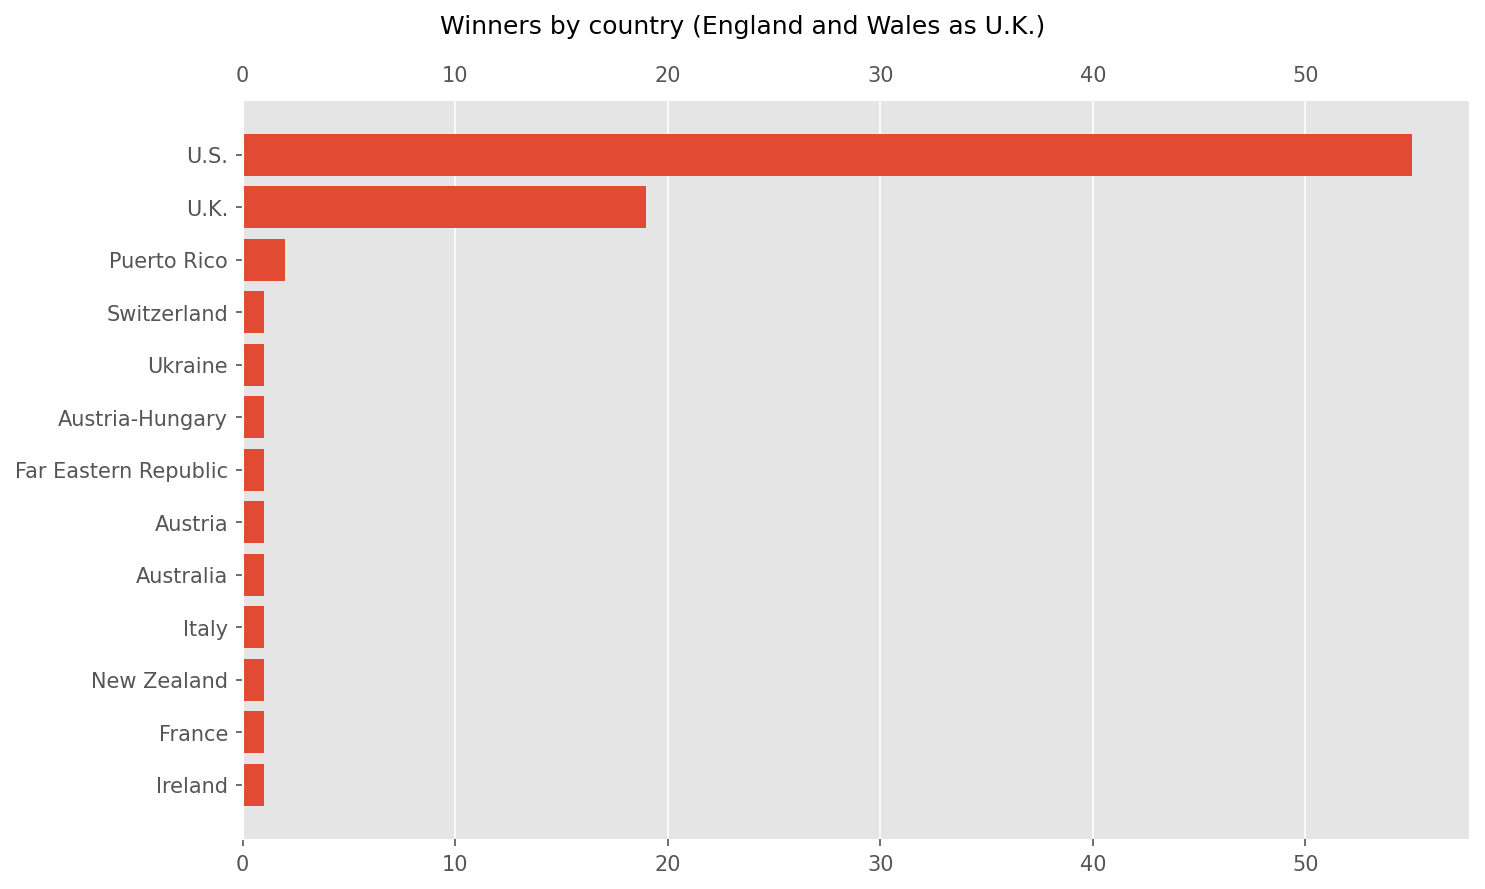

In [26]:
actors_copy = actors
mask = (actors_copy['Country'] == 'England') | (actors_copy['Country'] == 'Wales')
actors_copy.loc[mask, 'Country'] = 'U.K.'
countries = actors_copy['Country'].value_counts()

fig, ax = plt.subplots(figsize=(10, 6))

y = countries.index
width = countries.values

ax.barh(y=y, width=width)
ax.invert_yaxis()
ax.grid(axis='y', visible=False)
ax.tick_params(labeltop=True)
ax.spines.bottom.set_visible(False)
plt.suptitle('Winners by country (England and Wales as U.K.)')
plt.tight_layout()
plt.show()